# Corner Detection

In [1]:
import numpy as np
import cv2
import warnings
import matplotlib.pyplot as plt

%matplotlib inline
warnings.filterwarnings("ignore")

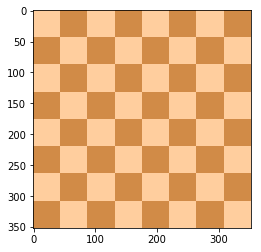

In [2]:
flat_chess = cv2.imread("Computer-Vision-with-Python/DATA/flat_chessboard.png")
flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)
plt.imshow(flat_chess)

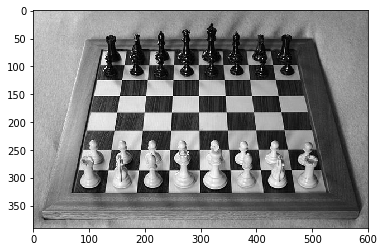

In [3]:
gray_flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_RGB2GRAY)
real_chess = cv2.imread("Computer-Vision-with-Python/DATA/real_chessboard.jpg")
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)
gray_real_chess = cv2.cvtColor(real_chess, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_real_chess, cmap = 'gray')

In [4]:
# change to gray and convert into float since Harris CD algorithms needs float data type
gray = np.float32(gray_flat_chess)

## Harris corner detection

In [5]:
dst = cv2.cornerHarris(src = gray, blockSize = 2, ksize = 3, k = 0.04)
dst = cv2.dilate(dst, None) # make detected dots slightly bigger

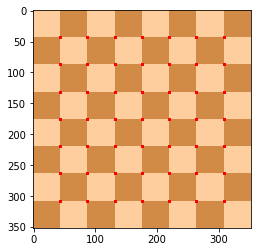

In [6]:
flat_chess[dst > 0.01 * dst.max()] = [255,0,0]
plt.imshow(flat_chess)

### Apply to the real chess board

In [7]:
gray = np.float32(gray_real_chess)

In [8]:
dst = cv2.cornerHarris(src = gray, blockSize = 2, ksize = 3, k = 0.04)
dst = cv2.dilate(dst, None)
real_chess[dst > 0.01 * dst.max()] = [255,0,0]

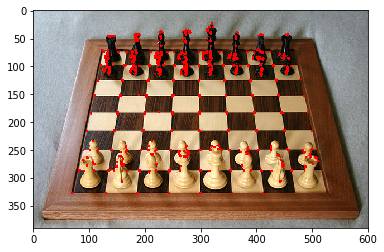

In [9]:
plt.imshow(real_chess)

## Shi-Tomasi Corner Detection

Since Shi-Tomasi does not automatically mark the corner, we need to take extra step in order to draw circle on real image

In [10]:
# load image again
flat_chess = cv2.imread("Computer-Vision-with-Python/DATA/flat_chessboard.png")
flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)
gray_flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_RGB2GRAY)

corner = cv2.goodFeaturesToTrack(gray_flat_chess, 30, 0.01, 10) # detect 30 corners

### Extra step

In [11]:
# convert into integer
corner = np.int0(corner)

In [12]:
for i in corner:
    x,y = i.ravel()
    cv2.circle(flat_chess, (x,y), 3, (255,0,0), -1)

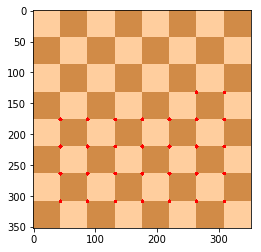

In [13]:
plt.imshow(flat_chess)